# _Shark Attacks between 2017 and 2020_
***
> Created by _[nadyakant](https://github.com/nadyakant)_, this data study is based on _[Brenda Griffith's](https://www.kaggle.com/datasets/thedevastator/global-shark-attack-incidents?select=GSAF5.xls.csv)_ Dataset on _[Kaggle](https://www.kaggle.com)_. It reflects reported incidents caused by shark attacks around the globe. 
> In this report we will showcase some Pandas and Numpy feacures.
> #### _About:_
>  __I. Importing, Cleaning and Formatting Data__
> - 1. Importing Data
> - 2. Joining 2 Data Frames
> - 3. Cleaning the data frame
> - 4. Augmenting our data with additional columns
> - 5. Replacing NaN values with 0s
>
> __II. Vusualization and Analysis__
> - 1. Fatal to Non-fatal Cases
> - 2. Calculating new values
> - 3. Provoked and unprovoked cases
> - 3. Provoked and unprovoked cases

## __I. Importing, Cleaning and Formatting Data__

### 1. Importing Data

***
> Firstly, I will be importing all crucial libraries for reading, cleaning, formatting and aggregation. Then, my data set of choice in .csv format. 
> After that, let's print it and see the 2 tables separately ("sa_dataset.csv" and "sa_fatality.csv").

In [2]:
import numpy as np
import pandas as pd
# Import Data
da = pd.read_csv("sa_dataset.csv")
fa = pd.read_csv("sa_fatality.csv")
# Prints Results from Shark Attacks dataset
da.head(2)

,index,Case Number,Date,Year,Type,Country,Name,Injury,Time,Species,Investigator or Source,pdf,href,Case Number.1,original order
0,1,2020.01.30.R,1/30/2020,2020,Provoked,BAHAMAS,Ana Bruna Avila,PROVOKED INCIDENT Scratches to left wrist,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN
1,2,2020.01.17,1/17/2020,2020,Unprovoked,AUSTRALIA,Will Schroeter,Laceration ot left ankle and foot,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,6502.0


In [3]:
# Prints Results from Shark Attacks Fatality dataset
fa.head(2)

,index,Case Number,Year,Gender,Age,Fatal (Y/N),original order
0,1,2020.01.30.R,2020,F,24.0,N,NaN
1,2,2020.01.17,2020,M,59.0,N,6502.0


### 2. Joining 2 Data Frames

***
> Since, our 2 tables contain mergable data on their case index, I would prefer to join them in one table.

In [4]:
# Join Data Frames
sharkattacks_dataframe = pd.merge(da,fa,on='index')
sharkattacks_dataframe.head(3)

,index,Case Number_x,Date,Year_x,Type,Country,Name,Injury,Time,Species,...,pdf,href,Case Number.1,original order_x,Case Number_y,Year_y,Gender,Age,Fatal (Y/N),original order_y
0,1,2020.01.30.R,1/30/2020,2020,Provoked,BAHAMAS,Ana Bruna Avila,PROVOKED INCIDENT Scratches to left wrist,NaN,NaN,...,NaN,NaN,NaN,NaN,2020.01.30.R,2020,F,24.0,N,NaN
1,2,2020.01.17,1/17/2020,2020,Unprovoked,AUSTRALIA,Will Schroeter,Laceration ot left ankle and foot,08h00,"""A small shark""",...,2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,6502.0,2020.01.17,2020,M,59.0,N,6502.0
2,3,2020.01.16,1/16/2020,2020,Unprovoked,NEW ZEALAND,Jordan King,Minor injury to lower leg,20h30,Broadnose seven gill shark?,...,2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,6501.0,2020.01.16,2020,F,13.0,N,6501.0


### 3.Cleaning the data frame

***
> Some of the columns apper to have doubled which results in "dirty" data. 
> So let's clean it, removing all unnecessary columns.

In [5]:
# Clean the data frame
sharkattacks_dataframe = sharkattacks_dataframe.drop \
(columns=['Case Number_y' , 'Year_y' , 'href', 'original order_y', 'Case Number.1', 'pdf'])
sharkattacks_dataframe.head(2)

,index,Case Number_x,Date,Year_x,Type,Country,Name,Injury,Time,Species,Investigator or Source,original order_x,Gender,Age,Fatal (Y/N)
0,1,2020.01.30.R,1/30/2020,2020,Provoked,BAHAMAS,Ana Bruna Avila,PROVOKED INCIDENT Scratches to left wrist,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,F,24.0,N
1,2,2020.01.17,1/17/2020,2020,Unprovoked,AUSTRALIA,Will Schroeter,Laceration ot left ankle and foot,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",6502.0,M,59.0,N


### 4. Augmenting our data with additional columns

***
> I noticed that the "Time" column contains strings instead of a readable time format. Althought, we could just replace the letter "h" inbetween numbers with a ":", for exercising puposes I will be creating a new column named "Hour". It will display only the HH part of the time. 

In [6]:
for Time in sharkattacks_dataframe:
  if str(['Time']) != 'NaN':
    sharkattacks_dataframe['Hour'] = sharkattacks_dataframe['Time'].str[0:2]
    sharkattacks_dataframe['Hour'] = sharkattacks_dataframe['Hour'].astype('int32')
sharkattacks_dataframe.head(2)

<class 'ValueError'>: cannot convert float NaN to integer

### 5. Replacing NaN values with 0s

***
> Oops, something happened. NaN values seem to interact wrongly with some of the functions. So, let's replace them with zeros.

In [7]:
sharkattacks_dataframe = sharkattacks_dataframe.replace([np.nan, -np.inf], 0.0)
sharkattacks_dataframe.head(2)

,index,Case Number_x,Date,Year_x,Type,Country,Name,Injury,Time,Species,Investigator or Source,original order_x,Gender,Age,Fatal (Y/N),Hour
0,1,2020.01.30.R,1/30/2020,2020,Provoked,BAHAMAS,Ana Bruna Avila,PROVOKED INCIDENT Scratches to left wrist,0.0,0.0,"K. McMurray, TrackingSharks.com",0.0,F,24.0,N,0.0
1,2,2020.01.17,1/17/2020,2020,Unprovoked,AUSTRALIA,Will Schroeter,Laceration ot left ankle and foot,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",6502.0,M,59.0,N,08


## __II. Vusualization and Analysis__

***
> Welcome to the second station in this analysis. Here you will discover meaningful insights reffering to the previous tasks. So far, we've gained knowledge about a short list of shark attack cases. Let's create statements based on this dataset.

### 1. Fatal to Non-fatal Cases

***
> With the help of _[matplotlib](https://matplotlib.org)_ I want to showcase the significant difference between the number of shark attack cases with a fatal end and those that ended with an injury (non-fatal).
A _[study by NOAA](https://oceanservice.noaa.gov/facts/sharkseat.html#:~:text=Despite%20their%20scary%20reputation%2C%20sharks,on%20fish%20and%20marine%20mammals.)_ says that "If a shark sees a human splashing in the water, it may try to investigate, leading to an accidental attack. Still, sharks have more to fear from humans than we do of them." meaning sharks aren't very keen to attack humans for their meat.
>
> And even though, our data study shows that only 3 out of 23 cases result in death, still 13% of all shark attacks (from our dataset) end fatally. 
>
> See graph bellow:

In [8]:
# Sum of Fatal and Non-fatal attacks
y = np.array(sharkattacks_dataframe['Fatal (Y/N)'])
num_zeros = (y == 'Y').sum()
num_ones = (y == 'N').sum()
print(num_zeros,"to", num_ones)
print("fatal to non-fatal cases")
print(3/23*100,"%")

3 to 23
fatal to non-fatal cases
13.043478260869565 %


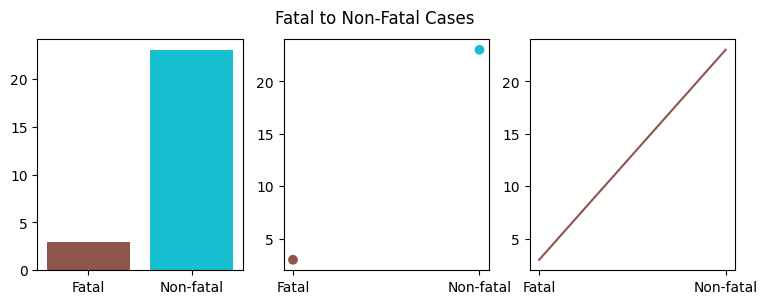

In [9]:
# Importing Viz Libraries
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
## Data 
fn = ['Fatal', 'Non-fatal']
counts = (num_zeros, num_ones)
bar_colors = ['tab:brown', 'tab:cyan']
# Setting Canvas Parameters 
plt.figure(figsize=(9, 3))
# Plotting
plt.subplot(131)
plt.bar(fn, counts, color=bar_colors)
plt.subplot(132)
plt.scatter(fn, counts, color=bar_colors)
plt.subplot(133)
plt.plot(fn, counts, color='tab:brown')
plt.suptitle('Fatal to Non-Fatal Cases')
plt.show()

### 2. Calculating new values

***
> To highlight the thesis of sharks attacking humans by accident, I will dive a little deeper into the accident occurance by country, its fataliy and whether or not attacks were provoked.
>
> To do so, I'll need additional calculations and their visualizations.

In [10]:
print("1 in", 5460/7, "white sharks.")
my_float = (7/25670051)*100
print(f'{my_float:f}',"%","or 1 in", 25670051/7, "Australians.")

1 in 780.0 white sharks.
0.000027 % or 1 in 3667150.1428571427 Australians.


In [11]:
# Getting the quantity of cases by Country
ct = sharkattacks_dataframe['Country'].value_counts().reset_index().rename(columns={"index": "value", 0: "Country"})
ct

,value,Country
0,AUSTRALIA,7
1,USA,6
2,NEW ZEALAND,2
3,SOUTH AFRICA,2
4,MEXICO,2
5,BAHAMAS,1
6,THAILAND,1
7,NEW CALEDONIA,1
8,SEYCHELLES,1
9,PAPUA NEW GUINEA,1


In [12]:
ft = sharkattacks_dataframe['Fatal (Y/N)'].value_counts().reset_index().rename(columns={"index": "value", 0: "fatality"})
ft

,value,Fatal (Y/N)
0,N,23
1,Y,3


In [13]:
pup = sharkattacks_dataframe['Type'].value_counts().reset_index().rename(columns={"index": "value", 0: "type"})
pup

,value,Type
0,Unprovoked,21
1,Provoked,3
2,Questionable,1
3,Watercraft,1


In [14]:
print((3/21*100),"%", "provoked cases")

14.285714285714285 % provoked cases


### 3. Provoked and unprovoked cases

***
> Seen bellow are 2 graphic figures - a line graph and a pie chart. 
>
> - __On the line graph:__ each dot represents a shark attack. By its horizontal level we can follow whether or not the accitent was provoked. By its vertical value we can see the year of the case.
> - __By the pie chart:__ we can recognise the proportion of provoked attacks to unprovoked such.
>
> Looking at these figures one can conclude that cases of shark attacks are rarely provoked or to be exact only 13% of all attacks were provoked by men. There is a percentage similarity between the provoked and fatal cases. Roughly 1 in 10 shark attack cases ends with a victims. The same number (1 in 10) goes for provoked cases. 

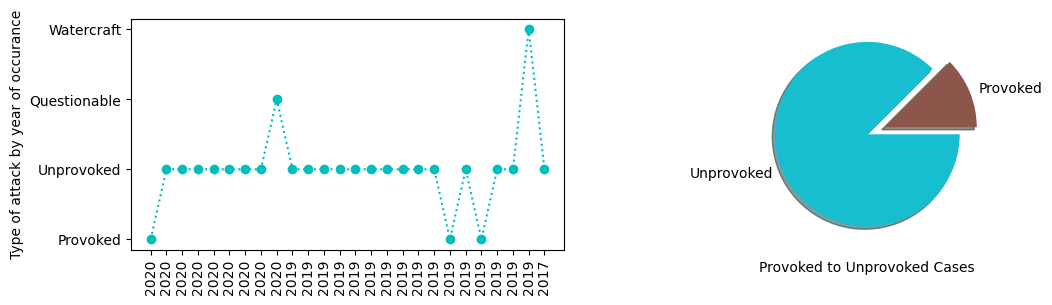

In [15]:
# Setting values of provoked and unprovoked cases
nn = ['Provoked', 'Unprovoked']
x = np.array(sharkattacks_dataframe['Type'])
num_p = (x == 'Provoked').sum()
num_up = (x == 'Unprovoked').sum()
pp = (num_p, num_up)
# Formatting
bar_colors = ['tab:brown', 'tab:cyan']
myexplode = [0.2, 0]
# Plotting
plt.figure(figsize=(19, 3))
plt.subplot(131)
plt.plot(sharkattacks_dataframe['Type'], 'o:c')
plt.xticks(range(0,len(sharkattacks_dataframe['Type'])), sharkattacks_dataframe['Year_x'], rotation = 90)
plt.ylabel("Type of attack by year of occurance")
plt.subplot(132)
plt.pie(pp, labels = nn, colors =bar_colors, explode = myexplode, shadow = True)
plt.xlabel('Provoked to Unprovoked Cases')
plt.show()

### 4.Deeper study of Provoked/Unprovoked cases

***
> Seen bellow are two gaphic figres supporting my final statement on the Shark Attacks dataset.
>
> - __On the bar chart:__ each bar represents a country. Horizontally we can follow the number of shark attack cases by country.
> - __On the scatter plot:__ each dot coresponds with the bar chart, representing the number of attacks per country. The red line goes through the number of fatal cases. The blue line illustrates the number of non-fatal cases.
>
> Seems like Australians have been the biggest target for sharks between 2017 and 2020. According to the United Nations _[Australia's population](https://www.macrotrends.net/countries/AUS/australia/population)_ peaked at 25,670,051 in 2020. _[ Australia's population of white sharks](https://www.fish.wa.gov.au/Documents/shark_hazard/white_shark_fact_sheet.pdf)_ is roughly around 5,460.
> This would mean that 1 in 780 white sharks (assuming wrongly that all accidents were caused by this species) has attacked an Australian between 2017 and 2020. Or that 1 in every 3,667,150 Australians has been attacked by some type of a shark between those years. This makes 0.000027 % of Australia's population.

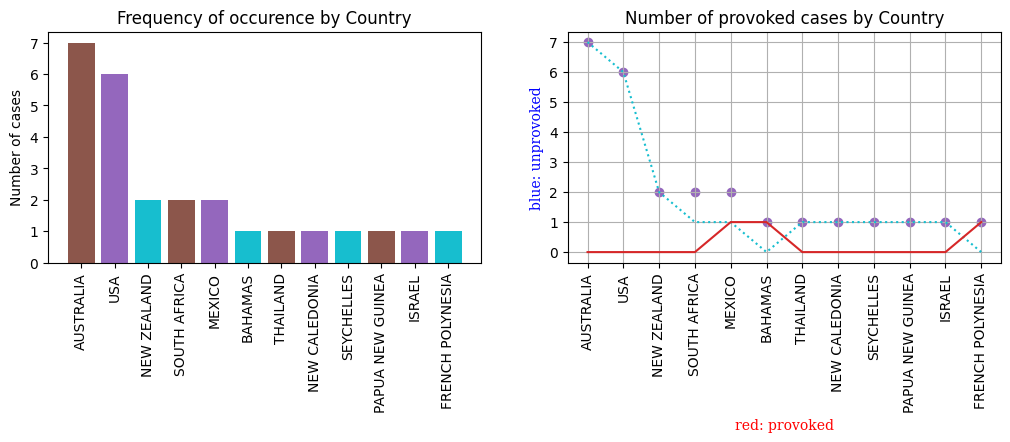

In [16]:
import matplotlib.pyplot as plt
## Data
value = ct["value"]
country = ct["Country"]
x = ['AUSTRALIA', 'USA', 'NEW ZEALAND', 'SOUTH AFRICA', 'MEXICO', 'BAHAMAS', 'THAILAND', 'NEW CALEDONIA', 'SEYCHELLES', 'PAPUA NEW GUINEA', 'ISRAEL', 'FRENCH POLYNESIA']
## Formatting
bar_colors = ['tab:brown','tab:purple', 'tab:cyan']
# Plotting
plt.figure(figsize=(19, 3))
plt.subplot(131)
plt.bar(value, country, label=x, color=bar_colors)
plt.ylabel('Number of cases')
plt.title('Frequency of occurence by Country')
plt.xticks(x, rotation=90)
#
plt.subplot(132)
plt.title('Number of provoked cases by Country')
plt.scatter(value, country, color = 'tab:purple')
plt.xticks(x, rotation=90)
u = np.array([7, 6, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0])
plt.plot(value, u, ls = ':', color='tab:cyan')
p = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])
plt.plot(value, p, ls = '-', color='tab:red')
red = {'family':'serif','color':'red','size':10}
cyan = {'family':'serif','color':'blue','size':10}
plt.xlabel("red: provoked", fontdict = red)
plt.ylabel("blue: unprovoked", fontdict = cyan)
plt.grid()
plt.show()